In [47]:
import math
import time
import numpy as np
import pylab as pl
%matplotlib inline

In [13]:
from random import randrange

def partition(A, start, end, pivot):
    A[pivot], A[end] = A[end], A[pivot]
    j = start
    for i in xrange(start, end):
        if A[i] < A[end]:
            A[i], A[j] = A[j], A[i]
            j += 1
    A[j], A[end] = A[end], A[j]
    return j


def quick_sort(A, start, end):
    if start >= end:
        return A
    pivot = randrange(start, end + 1)
    j = partition(A, start, end, pivot)
    quick_sort(A, start, j - 1)
    quick_sort(A, j + 1, end)


def sort(A):
    quick_sort(A, 0, len(A) - 1)
    return A

In [14]:
B = np.random.permutation(range(0,10))
print B
sort(B)
print B

[5 2 8 7 0 3 1 9 4 6]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
<html>
<h2>Correctitud</h2>
<h3>Invariante: Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.</h3>
</html>

SyntaxError: invalid syntax (<ipython-input-12-fc10534f0e4e>, line 1)

In [30]:

def invariant(A,start,end, pivot):
    for x in range(start, pivot):
        if A[x]>A[pivot]:
            return False
    for x in range(pivot, end):
        if A[x]<A[pivot]:
            return False
    return True


In [32]:
print invariant([1, 2, 3, 4, 5], 0, 5, 2)
print invariant([5, 2, 3, 4, 5], 0, 5, 2)

True
False


In [33]:
from random import randrange

def partition(A, start, end, pivot):
    A[pivot], A[end] = A[end], A[pivot]
    j = start
    for i in xrange(start, end):
        if A[i] < A[end]:
            A[i], A[j] = A[j], A[i]
            j += 1
    A[j], A[end] = A[end], A[j]
    return j


def quick_sort(A, start, end):
    if start >= end:
        return A
    pivot = randrange(start, end + 1)
    j = partition(A, start, end, pivot)
    assert invariant(A, start,end,j)
    quick_sort(A, start, j - 1)
    quick_sort(A, j + 1, end)


def right_quick_sort(A):
    quick_sort(A, 0, len(A) - 1)
    return A

In [34]:

B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_quick_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [43]:
from random import randrange

def partition(A, start, end, pivot):
    A[pivot], A[end] = A[end], A[pivot]
    j = start
    for i in xrange(start, end):
        if A[i] > A[end]:
            A[i], A[j] = A[j], A[i]
            j += 1
    A[j], A[end] = A[end], A[j]
    return j


def quick_sort(A, start, end):
    try:
        if start >= end:
            return A
        pivot = randrange(start, end + 1)
        j = partition(A, start, end, pivot)
        assert invariant(A, start,end,j)
        quick_sort(A, start, j - 1)
        quick_sort(A, j + 1, end)
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "pivot=", new_pivot
        print "A=", A


def wrong_quick_sort(A):
    quick_sort(A, 0, len(A) - 1)
    return A



In [46]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
print B
wrong_quick_sort(B)


[5, 4, 6, 3, 7, 2, 8, 1, 9]
Error en el invariante de ciclo!
pivot= 7
A= [5, 4, 6, 3, 7, 9, 8, 2, 1]


[5, 4, 6, 3, 7, 9, 8, 2, 1]

In [117]:
from random import randrange

def partition(A, start, end, pivot):
    A[pivot], A[end] = A[end], A[pivot]
    j = start
    for i in xrange(start, end):
        if A[i] < A[end]:
            A[i], A[j] = A[j], A[i]
            j += 1
    A[j], A[end] = A[end], A[j]
    return j


def quick_sort(A, start, end):
    if start >= end:
        return A
    pivot = randrange(start, end + 1)
    j = partition(A, start, end, pivot)
    quick_sort(A, start, j - 1)
    quick_sort(A, j + 1, end)


def time_quick_sort(A):
    tic = time.clock()#get start time
    quick_sort(A, 0, len(A) - 1)
    toc = time.clock()#get final time
    
    time_qs=toc-tic
    return time_qs*10000000




In [118]:
B = np.random.permutation(range(0,10))
print time_quick_sort(B)

529.716780875


In [119]:
import random as rnd

def exper_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        results.append(time_quick_sort(l))
    return results

In [120]:

print exper_analysis(10)

[16.553649402339943, 6.621460215683328, 122.49700603206293, 158.91503608145285, 132.42919521871954, 115.8755458163796, 112.56481684540631, 132.42919521871954, 168.84722299437271, 198.6437928280793]


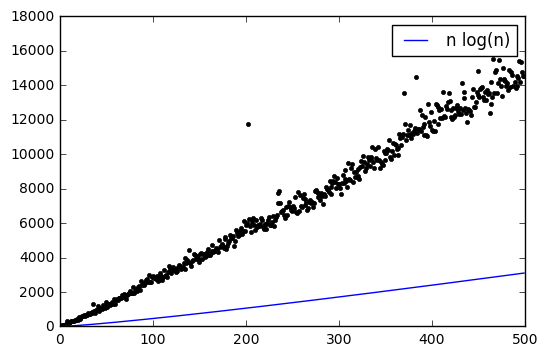

In [121]:
pl.clf()
x = np.arange(500)
y = np.array(exper_analysis(500))
pl.plot(x, y, 'k.')


x = range(1,500)
pl.plot(x,x*np.log(x),"-", label="n log(n)")
pl.legend()
pl.show()

